In [25]:
#WebScraping - requests, Beautifulsoup
#Data Cleansing - Pandas
#Graphs - matplotlib

import requests
import html5lib
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
virat_url = "https://stats.espncricinfo.com/ci/engine/player/253802.html?class=2;template=results;type=batting;view=innings"

url_data = requests.get(virat_url)

In [3]:
print(url_data)

<Response [200]>


In [4]:
print(url_data.content)

b'\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<!-- hostname: web03, edition-view: , country: unknown, cluster: www, created: 2022-02-10 09:10:10 -->\n<html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://developers.facebook.com/schema/" >\n<head>\n <script type="text/javascript">var _sf_startpt=(new Date()).getTime()</script>\n <meta name="google-site-verification" content="ZxdgH3XglRg0Bsy-Ho2RnO3EE4nRs53FloLS6fkt_nc" />\n <meta\n        name="viewport"\n        content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0"\n      />\n <title>Batting records | One-Day Internationals | Cricinfo Statsguru | ESPNcricinfo.com</title>\n <meta http-equiv="Content-Type" content="text/html;charset=utf-8" />\n <meta name="keywords" content="" />\n \n <meta name="description" content="" />\n<!--[if

In [5]:
soup = BeautifulSoup(url_data.content, 'html5lib')

In [6]:
print(soup)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<!-- hostname: web03, edition-view: , country: unknown, cluster: www, created: 2022-02-10 09:10:10 --><html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head>
 <script type="text/javascript">var _sf_startpt=(new Date()).getTime()</script>
 <meta content="ZxdgH3XglRg0Bsy-Ho2RnO3EE4nRs53FloLS6fkt_nc" name="google-site-verification"/>
 <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/>
 <title>Batting records | One-Day Internationals | Cricinfo Statsguru | ESPNcricinfo.com</title>
 <meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
 <meta content="" name="keywords"/>
 
 <meta content="" name="description"/>
<!--[if IE 9]>
<script language="javascript" type="text/javascript">
function fnCreateJumpList(iScenario) 

In [7]:
table = soup.find('table', attrs = {'class':'engineTable'})
print(table)

<table class="engineTable" style="margin:0px;">

 <tbody><tr class="data2">
  <td class="left">
   <b>Records type</b> batting analysis
[<a href="javascript:void(0)" onmouseout="menuLayers.hide()" onmouseover="menuLayers.show('engine-dd-type', event); window.status='change type'; return true">change type</a>]

  </td>
 </tr>
 <tr class="data2">
  <td class="left">
   <b>View</b> innings by innings list
[<a href="javascript:void(0)" onmouseout="menuLayers.hide()" onmouseover="menuLayers.show('engine-dd-view', event); window.status='change view'; return true">change view</a>]

  </td>
 </tr>
 <tr class="data2">
  <td class="left">
   <b>Ordered by</b> start date (ascending)

  </td>
 </tr></tbody></table>


In [8]:
f = open("virat_stats.txt", "w")
f.write(soup.prettify())
f.close()

In [9]:
virat = open("virat_stats.txt", "r")
soup = BeautifulSoup(virat, 'html5lib')

In [11]:
table = soup.find('table', attrs = {'class': 'engineTable_virat'})

In [12]:
print(table)

<table class="engineTable_virat">
       <caption>
        Innings by innings list
       </caption>
       <thead>
        <tr class="headlinks">
         <th class="padAst" nowrap="">
          <a class="black-link" href="/ci/engine/player/253802.html?class=2;orderby=batted_score;template=results;type=batting;view=innings" title="sort by runs scored">
           Runs
          </a>
         </th>
         <th nowrap="">
          <a class="black-link" href="/ci/engine/player/253802.html?class=2;orderby=minutes;template=results;type=batting;view=innings" title="sort by minutes batted">
           Mins
          </a>
         </th>
         <th nowrap="">
          <a class="black-link" href="/ci/engine/player/253802.html?class=2;orderby=balls_faced;template=results;type=batting;view=innings" title="sort by balls faced">
           BF
          </a>
         </th>
         <th nowrap="">
          <a class="black-link" href="/ci/engine/player/253802.html?class=2;orderby=fours;template=

In [13]:
data = []
for row in table.findAll('tr', attrs = {'class':'data1'}):
    record = {}
    tds = row.find_all('td')
    record['runs'] = tds[0].text
    record['opponent'] = tds[10].text
    record['ground'] = tds[11].text
    record['date'] = tds[12].text
    data.append(record)
    

In [14]:
print(data)

[{'runs': '\n          12\n         ', 'opponent': '\n          v\n          \n           Sri Lanka\n          \n         ', 'ground': '\n          \n           Dambulla\n          \n         ', 'date': '\n          \n           18 Aug 2008\n          \n         '}, {'runs': '\n          37\n         ', 'opponent': '\n          v\n          \n           Sri Lanka\n          \n         ', 'ground': '\n          \n           Dambulla\n          \n         ', 'date': '\n          \n           20 Aug 2008\n          \n         '}, {'runs': '\n          25\n         ', 'opponent': '\n          v\n          \n           Sri Lanka\n          \n         ', 'ground': '\n          \n           Colombo (RPS)\n          \n         ', 'date': '\n          \n           24 Aug 2008\n          \n         '}, {'runs': '\n          54\n         ', 'opponent': '\n          v\n          \n           Sri Lanka\n          \n         ', 'ground': '\n          \n           Colombo (RPS)\n          \n         

In [16]:
for record in data:
    for key,value in record.items():
        record[key] = record[key].replace(" ", "")
        record[key] = record[key].replace("\n", "")
    record['opponent'] = record['opponent'].lstrip('v')
    record['runs'] = record['runs'].replace('*', "")

In [17]:
print(data)

[{'runs': '12', 'opponent': 'SriLanka', 'ground': 'Dambulla', 'date': '18Aug2008'}, {'runs': '37', 'opponent': 'SriLanka', 'ground': 'Dambulla', 'date': '20Aug2008'}, {'runs': '25', 'opponent': 'SriLanka', 'ground': 'Colombo(RPS)', 'date': '24Aug2008'}, {'runs': '54', 'opponent': 'SriLanka', 'ground': 'Colombo(RPS)', 'date': '27Aug2008'}, {'runs': '31', 'opponent': 'SriLanka', 'ground': 'Colombo(RPS)', 'date': '29Aug2008'}, {'runs': '2', 'opponent': 'SriLanka', 'ground': 'Colombo(RPS)', 'date': '14Sep2009'}, {'runs': '16', 'opponent': 'Pakistan', 'ground': 'Centurion', 'date': '26Sep2009'}, {'runs': 'TDNB', 'opponent': 'Australia', 'ground': 'Centurion', 'date': '28Sep2009'}, {'runs': '79', 'opponent': 'WestIndies', 'ground': 'Johannesburg', 'date': '30Sep2009'}, {'runs': '30', 'opponent': 'Australia', 'ground': 'Vadodara', 'date': '25Oct2009'}, {'runs': '10', 'opponent': 'Australia', 'ground': 'Mohali', 'date': '2Nov2009'}, {'runs': '27', 'opponent': 'SriLanka', 'ground': 'Rajkot', 'd

In [18]:
virat_df = pd.DataFrame(data)
virat_df.head()

,runs,opponent,ground,date
0,12,SriLanka,Dambulla,18Aug2008
1,37,SriLanka,Dambulla,20Aug2008
2,25,SriLanka,Colombo(RPS),24Aug2008
3,54,SriLanka,Colombo(RPS),27Aug2008
4,31,SriLanka,Colombo(RPS),29Aug2008


In [20]:
virat_df.runs.unique()

array(['12', '37', '25', '54', '31', '2', '16', 'TDNB', '79', '30', '10',
       '27', '107', '9', '91', '71', '102', 'DNB', '57', '0', '82', '18',
       '68', '11', '28', '8', '118', '105', '64', '63', '22', '87', '100',
       '34', '1', '59', '24', '35', '81', '94', '55', '7', '112', '86',
       '3', '117', '20', '23', '80', '77', '15', '66', '21', '133', '108',
       '183', '106', '38', '128', '6', '26', '58', '43', '115', '14',
       '61', '99', '19', '123', '78', '136', '48', '5', '40', '13', '62',
       '127', '49', '53', '139', '4', '46', '33', '44', '138', '85',
       '154', '45', '65', '122', '76', '96', '32', '111', '131', '110',
       '92', '39', '121', '29', '113', '160', '75', '36', '129', '140',
       '157', '104', '60', '116', '67', '72', '120', '114', '89', '51',
       '56'], dtype=object)

In [21]:
virat_df = virat_df[~virat_df.runs.isin(['DNB', 'TDNB'])]

In [22]:
virat_df.runs.unique()

array(['12', '37', '25', '54', '31', '2', '16', '79', '30', '10', '27',
       '107', '9', '91', '71', '102', '57', '0', '82', '18', '68', '11',
       '28', '8', '118', '105', '64', '63', '22', '87', '100', '34', '1',
       '59', '24', '35', '81', '94', '55', '7', '112', '86', '3', '117',
       '20', '23', '80', '77', '15', '66', '21', '133', '108', '183',
       '106', '38', '128', '6', '26', '58', '43', '115', '14', '61', '99',
       '19', '123', '78', '136', '48', '5', '40', '13', '62', '127', '49',
       '53', '139', '4', '46', '33', '44', '138', '85', '154', '45', '65',
       '122', '76', '96', '32', '111', '131', '110', '92', '39', '121',
       '29', '113', '160', '75', '36', '129', '140', '157', '104', '60',
       '116', '67', '72', '120', '114', '89', '51', '56'], dtype=object)

In [23]:
virat_df.head()

,runs,opponent,ground,date
0,12,SriLanka,Dambulla,18Aug2008
1,37,SriLanka,Dambulla,20Aug2008
2,25,SriLanka,Colombo(RPS),24Aug2008
3,54,SriLanka,Colombo(RPS),27Aug2008
4,31,SriLanka,Colombo(RPS),29Aug2008


In [41]:
virat_df['Match_No'] = np.arange(1, len(virat_df)+1)

In [30]:
virat_df['runs'] = virat_df['runs'].apply(pd.to_numeric, errors = 'coerce')

In [31]:
virat_df['total'] = virat_df['runs'].cumsum()

In [42]:
virat_df.head()

,runs,opponent,ground,date,Match_No,total
0,12,SriLanka,Dambulla,18Aug2008,1,12
1,37,SriLanka,Dambulla,20Aug2008,2,49
2,25,SriLanka,Colombo(RPS),24Aug2008,3,74
3,54,SriLanka,Colombo(RPS),27Aug2008,4,128
4,31,SriLanka,Colombo(RPS),29Aug2008,5,159


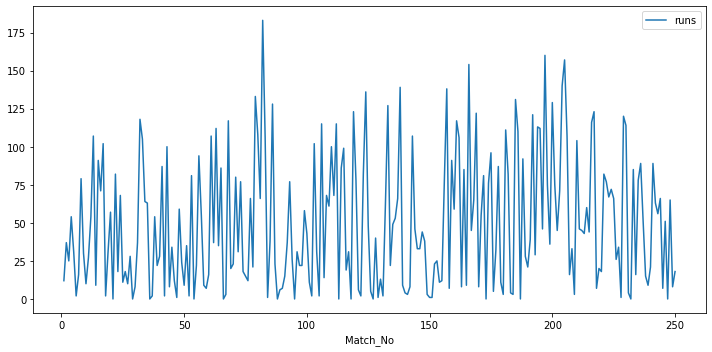

In [44]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

virat_df.plot('Match_No', 'runs')
plt.show()

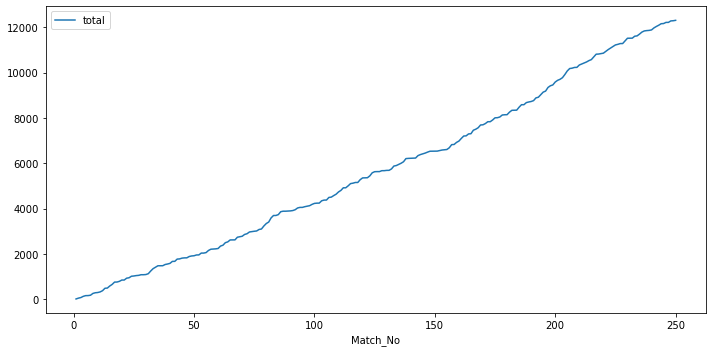

In [45]:
virat_df.plot('Match_No', 'total')
plt.show()

In [49]:
sachin_url = "https://stats.espncricinfo.com/ci/engine/player/35320.html?class=2;template=results;type=batting;view=innings"
url_data = requests.get(sachin_url)

In [50]:
soup = BeautifulSoup(url_data.content, 'html5lib')

In [51]:
f = open("sachin_stats.txt", "w")
f.write(soup.prettify())
f.close()

In [52]:
virat = open("sachin_stats.txt", "r")
soup = BeautifulSoup(virat, 'html5lib')

In [53]:
table = soup.find('table', attrs = {'class': 'engineTable_sachin'})

In [54]:
print(table)

<table class="engineTable_sachin">
       <caption>
        Innings by innings list
       </caption>
       <thead>
        <tr class="headlinks">
         <th class="padAst" nowrap="">
          <a class="black-link" href="/ci/engine/player/35320.html?class=2;orderby=batted_score;template=results;type=batting;view=innings" title="sort by runs scored">
           Runs
          </a>
         </th>
         <th nowrap="">
          <a class="black-link" href="/ci/engine/player/35320.html?class=2;orderby=minutes;template=results;type=batting;view=innings" title="sort by minutes batted">
           Mins
          </a>
         </th>
         <th nowrap="">
          <a class="black-link" href="/ci/engine/player/35320.html?class=2;orderby=balls_faced;template=results;type=batting;view=innings" title="sort by balls faced">
           BF
          </a>
         </th>
         <th nowrap="">
          <a class="black-link" href="/ci/engine/player/35320.html?class=2;orderby=fours;template=res

In [55]:
data = []
for row in table.findAll('tr', attrs = {'class':'data1'}):
    record = {}
    tds = row.find_all('td')
    record['runs'] = tds[0].text
    record['opponent'] = tds[10].text
    record['ground'] = tds[11].text
    record['date'] = tds[12].text
    data.append(record)

In [56]:
for record in data:
    for key,value in record.items():
        record[key] = record[key].replace(" ", "")
        record[key] = record[key].replace("\n", "")
    record['opponent'] = record['opponent'].lstrip('v')
    record['runs'] = record['runs'].replace('*', "")

In [57]:
sachin_df = pd.DataFrame(data)
sachin_df.head()

,runs,opponent,ground,date
0,0,Pakistan,Gujranwala,18Dec1989
1,0,NewZealand,Dunedin,1Mar1990
2,36,NewZealand,Wellington,6Mar1990
3,10,SriLanka,Sharjah,25Apr1990
4,20,Pakistan,Sharjah,27Apr1990


In [58]:
sachin_df.runs.unique()

array(['0', '36', '10', '20', '19', '31', '53', '30', 'DNB', '4', '52',
       '22', '11', '49', '62', '1', '57', '48', '21', '77', '69', '35',
       '54', '81', '84', '14', '39', '15', '32', '23', '82', '3', '24',
       '5', '34', '8', '25', '26', '2', '28', '63', '40', '73', '6',
       '110', '115', '66', '88', '105', '13', '37', '47', '112', '41',
       '7', '65', '127', '70', '90', '137', '100', '118', '17', '89',
       '64', '67', '114', '104', '45', '44', '9', '117', 'TDNB', '27',
       '51', '91', '95', '80', '38', '143', '134', '33', '18', '128',
       '29', '141', '124', '140', '16', '120', '85', '186', '12', '93',
       '122', '101', '61', '146', '139', '68', '87', '113', '152', '50',
       '98', '97', '83', '102', '86', '78', '74', '123', '42', '55', '60',
       '99', '71', '94', '43', '79', '72', '163', '46', '138', '175',
       '96', '200', '111'], dtype=object)

In [59]:
sachin_df = sachin_df[~sachin_df.runs.isin(['DNB', 'TDNB'])]

In [60]:
sachin_df['Match_No'] = np.arange(1, len(sachin_df)+1)
sachin_df['runs'] = sachin_df['runs'].apply(pd.to_numeric, errors = 'coerce')
sachin_df['total'] = sachin_df['runs'].cumsum()

In [61]:
sachin_df.head()

,runs,opponent,ground,date,Match_No,total
0,0,Pakistan,Gujranwala,18Dec1989,1,0
1,0,NewZealand,Dunedin,1Mar1990,2,0
2,36,NewZealand,Wellington,6Mar1990,3,36
3,10,SriLanka,Sharjah,25Apr1990,4,46
4,20,Pakistan,Sharjah,27Apr1990,5,66


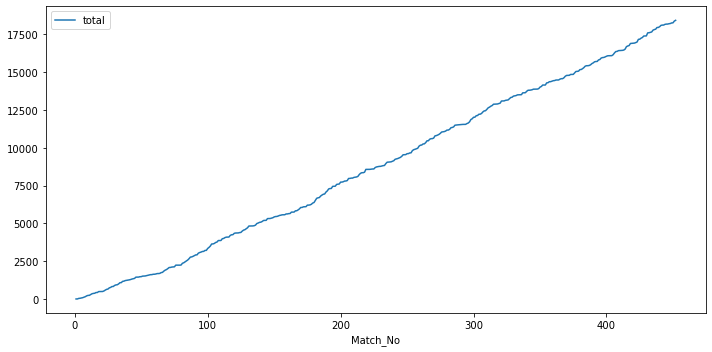

In [62]:
sachin_df.plot('Match_No', 'total')
plt.show()

In [64]:
v_s_df = pd.DataFrame()
v_s_df['Match_No'] = sachin_df['Match_No']
v_s_df['virat_runs'] = virat_df['runs']
v_s_df['sachin_runs'] = sachin_df['runs']

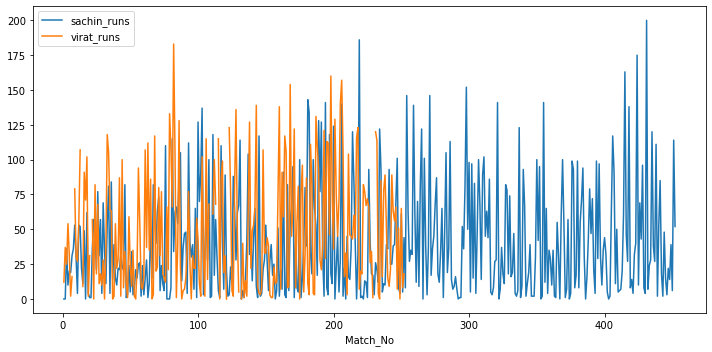

In [65]:
v_s_df.plot(x= 'Match_No', y= ['sachin_runs', 'virat_runs'])
plt.show()

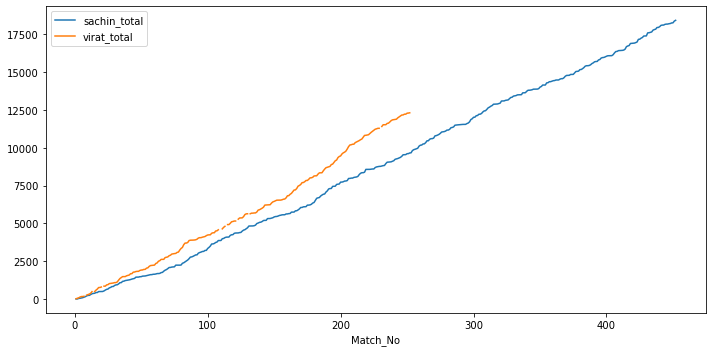

In [66]:
v_s_df['virat_total'] = virat_df['total']
v_s_df['sachin_total'] = sachin_df['total']
v_s_df.plot(x= 'Match_No', y= ['sachin_total', 'virat_total'])
plt.show()